# Background


In this project, customer segmentation is employed as a powerful strategy to gain a deeper understanding of the market and effectively target different groups of customers. Customer segmentation involves dividing the customer base into distinct segments based on various characteristics, such as demographics, behaviors, preferences, or purchasing patterns. By identifying these segments, businesses can tailor their marketing efforts, product offerings, and communication strategies to better meet the unique needs and preferences of each segment. 

The main objectives of this project is as follows:

- understand the target customers for the marketing team to plan a strategy
- identify the most important shopping groups based on income, age, and mall shopping score
- ideal number of groups or clusters with a label for each

In order to reach the objectives, the following steps are made:
1. Perform EDA
2. Use different methods in deteriming optimum clusters
3. Use K-Means of algorithm to create segments
4. Use summary statistics on clusters
5. Visualize the data.

LINK TO DATASET:
https://github.com/avirichie/Customer-Segmentation-using-Unsupervised-Learning

# Data Pre-Processing


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#Check for nulls or missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Data Exploration

In [6]:
df.columns 

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Axes: xlabel='count', ylabel='Gender'>

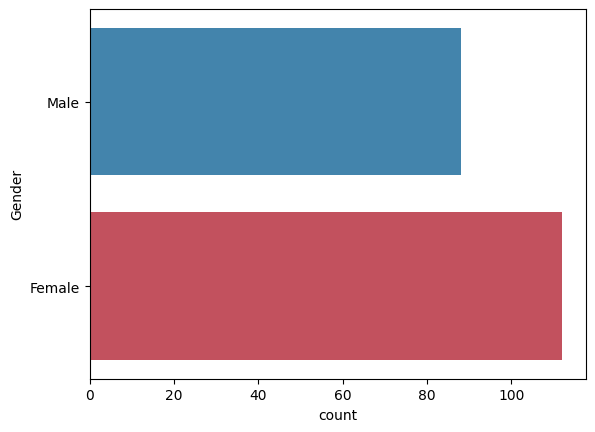

In [40]:
color = ['#3288bd', '#d53e4f']
sns.countplot(y = 'Gender', data = df, palette = color)

In [8]:
# Statistics segregated by gender
stats_gender = df.groupby('Gender').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
})

stats_gender

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [9]:
# Checking correlations between variables
df2 = df.drop('CustomerID', axis=1)
df2.corr()

<ipython-input-9-398b67acae84>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


The correlation coefficients suggest that there is very weak or little to no correlation between the variables. It will further explored below.

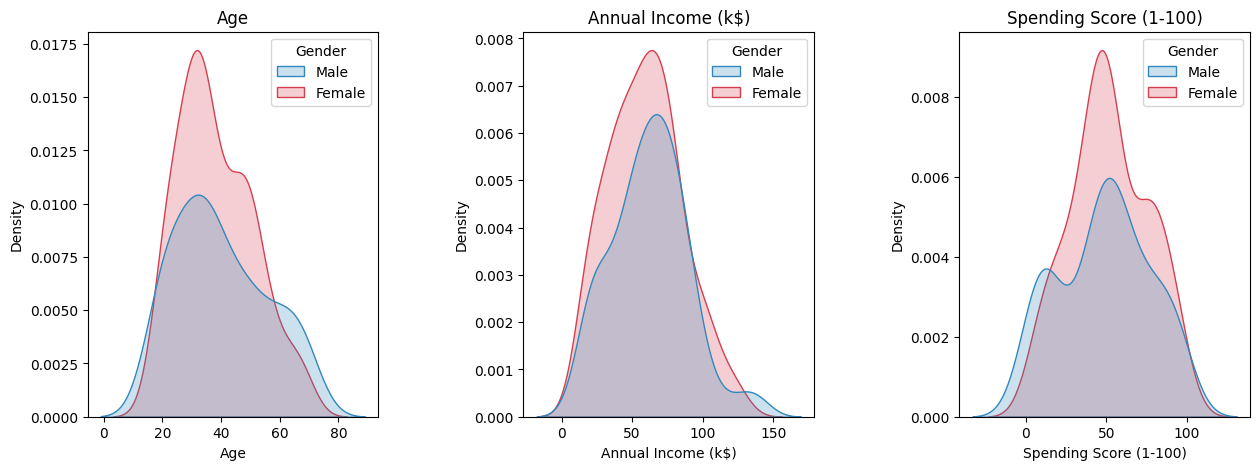

In [33]:
# Distribution of  Age, Annual Income, Spending Score based on Gender
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5)) 

for i, col in enumerate(columns):
    sns.kdeplot(data=df, x=col, fill=True, hue='Gender', ax=axes[i], palette = color)
    axes[i].set_title(col)

plt.subplots_adjust(wspace=0.5)
plt.show()

In [11]:
df['Gender'] = df['Gender'].astype(str)

In [12]:
# Filter DataFrame for male and female
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

In [15]:
# Define the age groups and corresponding labels
age_groups = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
age_labels = ['15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70']

df['Age Group'] = pd.cut(df['Age'], bins=age_groups, labels=age_labels)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group
0,1,Male,19,15,39,15-20
1,2,Male,21,15,81,20-25
2,3,Female,20,16,6,15-20
3,4,Female,23,16,77,20-25
4,5,Female,31,17,40,30-35


In [16]:
df['Age Group'].value_counts()

30-35    36
45-50    26
25-30    24
35-40    24
20-25    21
15-20    17
40-45    12
55-60    12
65-70    12
50-55    11
60-65     5
Name: Age Group, dtype: int64

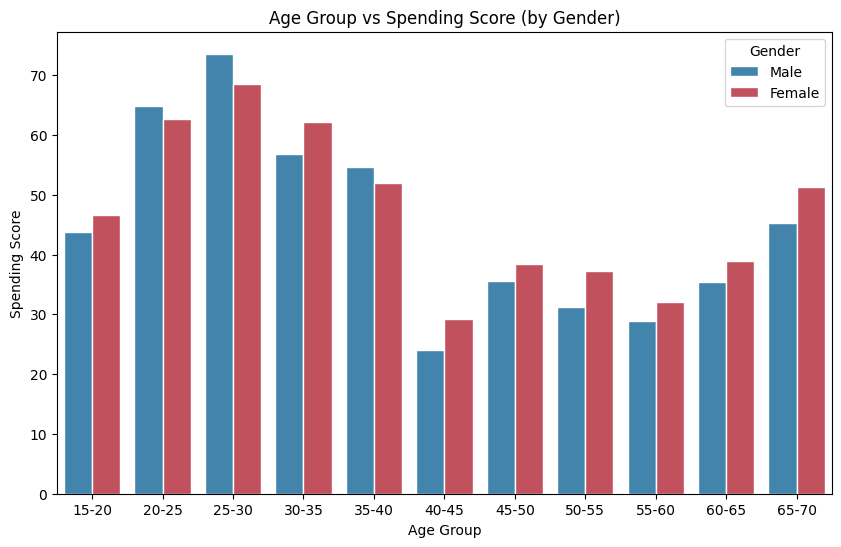

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age Group', y='Spending Score (1-100)', hue='Gender', 
            errorbar = None, palette = color, edgecolor = 'white')
plt.xlabel('Age Group')
plt.ylabel('Spending Score')
plt.title('Age Group vs Spending Score (by Gender)')
plt.legend(title='Gender')
plt.show()

The highest spending score for both genders is in the age group of 25-30 years old. It is also notable that high spending power can be seen in the age group from 20-40 years old.

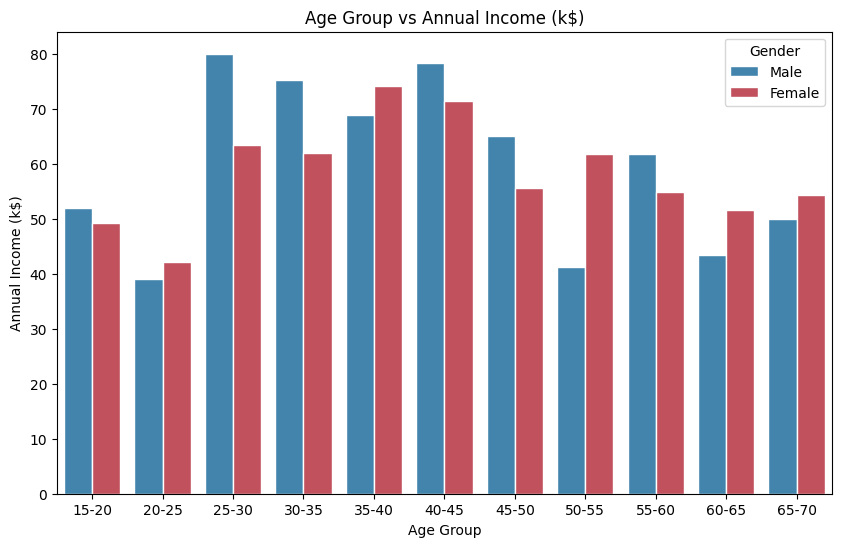

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age Group', y='Annual Income (k$)', hue='Gender', 
            errorbar = None, palette = color, edgecolor = 'white')
plt.xlabel('Age Group')
plt.ylabel('Annual Income (k$)')
plt.title('Age Group vs Annual Income (k$)')
plt.legend(title='Gender')
plt.show()

High annual income is observed at 25-45 years old for male and female customers.



# Optimum Cluster Determination

## Elbow Method

In elbow method, the graph typically exhibits a downward trend as the number of clusters (k) increases, with decreasing inertia scores. The inertia score represents the sum of squared distances of samples to their nearest cluster center.

The elbow method helps in determining the optimal number of clusters by looking for a point on the graph where the rate of decrease in inertia score significantly slows down, creating a bend that resembles an elbow. This bend indicates a trade-off between the reduction in inertia and the complexity of the model.

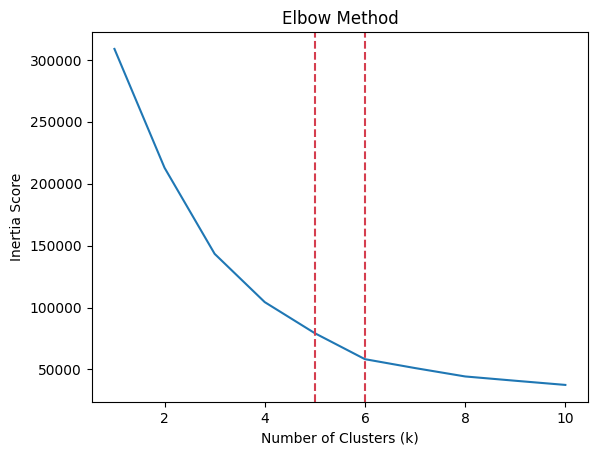

In [47]:
# Set variables to fit
X = df[['Age', 'Annual Income (k$)' ,'Spending Score (1-100)']]

# Plotting for inertia scores vs number of clusters
inertia_scores1 = []
for i in range(1,11):
  kmeans2 = KMeans(n_clusters=i, n_init = 10)
  kmeans2.fit(X)
  inertia_scores1.append(kmeans2.inertia_)

plt.plot(range(1,11),inertia_scores1)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia Score')
plt.axvline(x=5, color='#d53e4f', linestyle='--')
plt.axvline(x=6, color='#d53e4f', linestyle='--')  # Optimal cluster
plt.title('Elbow Method')
plt.show()

Based on this elbow curve,  the optimal number of clusters appears to be around 5, where the inertia score no longer decreases substantially as additional clusters are added.

## Silhoutte Score


The silhouette score is a measure of how well each data point fits within its assigned cluster and how distinct it is from other clusters. It ranges from -1 to 1, where a higher score indicates better clustering. The silhouette score takes into account both the cohesion (how close the data points are to each other within the same cluster) and the separation (how distinct the data points are from data points in other clusters). The optimal number of clusters can be determined by finding the number of clusters that maximizes the silhouette score.

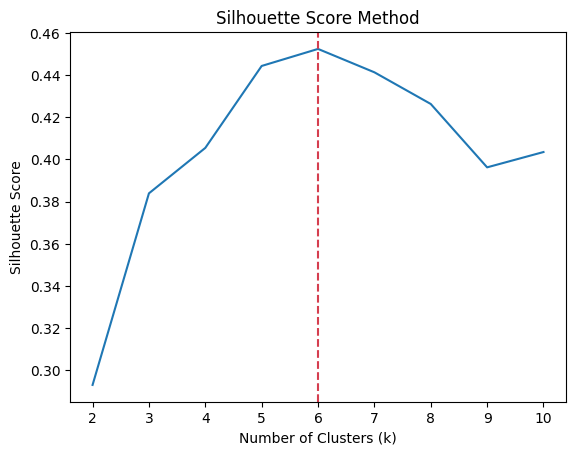

In [48]:
# Initilize loop for graphing the clusters vs silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init = 10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.axvline(x=6, color='#d53e4f', linestyle='--')
plt.title('Silhouette Score Method')
plt.show()


Based on the Silhouette Score graph, the peak is at 6 clusters which means that it could be the best choice for the optimal cluster in this dataset. For this project, I will be testing 5 and 6 clusters to determine which is best.

# Clustering

For this section, the number of clusters from the Elbow and Silhouette Scores method will be tested to find the optimal number of clusters to be used for K-Means Algorithm.



## Five cluster test

In [21]:
# For clusters of K=5
KM5 = KMeans(n_clusters = 5)
KM5.fit(X)
KM5_labels = KM5.labels_
KM5_df = df.copy()
KM5_df['Cluster'] = KM5_labels
KM5_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Cluster
0,1,Male,19,15,39,15-20,3
1,2,Male,21,15,81,20-25,0
2,3,Female,20,16,6,15-20,3
3,4,Female,23,16,77,20-25,0
4,5,Female,31,17,40,30-35,3


In [22]:
# Centroids from Age, Average Income, and Spending Score respectively
KM5_centroids = KM5.cluster_centers_
KM5_centroids

array([[24.96      , 28.04      , 77.        ],
       [43.72727273, 55.48051948, 49.32467532],
       [32.69230769, 86.53846154, 82.12820513],
       [45.2173913 , 26.30434783, 20.91304348],
       [40.66666667, 87.75      , 17.58333333]])

In [23]:
# Convert to dataframe and assign proper column names
KM5_centers = pd.DataFrame(KM5_centroids)
KM5_centers.columns = ['Age' , 'Annual Income' , 'Spending Score']
KM5_centers

,Age,Annual Income,Spending Score
0,24.960000,28.040000,77.000000
1,43.727273,55.480519,49.324675
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,40.666667,87.750000,17.583333


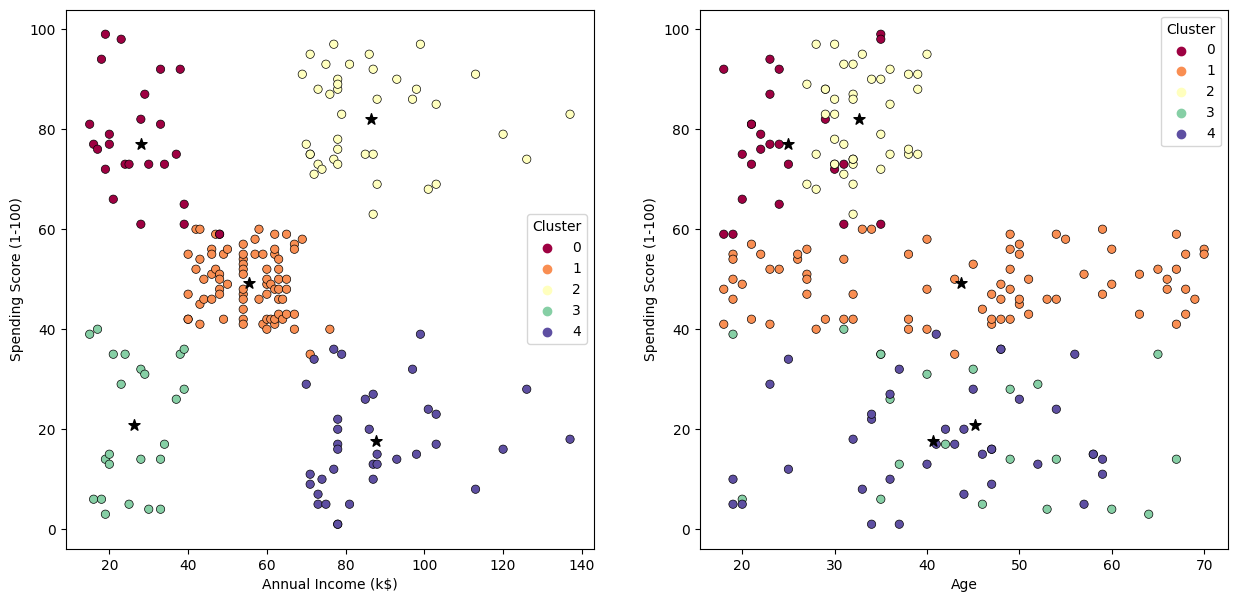

In [58]:
fig1, axes = plt.subplots(1, 2, figsize=(15, 7))

# Scatterplot for Annual Income vs Spending Score
sns.scatterplot(data = KM5_df, x = 'Annual Income (k$)', y= 'Spending Score (1-100)',
                hue='Cluster', ax=axes[0], palette='Spectral', 
                edgecolor = 'black', legend='full')

# Scatterplot for Age vs Spending Score
sns.scatterplot( data=KM5_df, x = 'Age', y= 'Spending Score (1-100)',
                hue='Cluster', ax=axes[1], palette='Spectral', 
                edgecolor = 'black', legend='full')

# Adding centroids for clusters
axes[0].scatter(x= KM5_centers['Annual Income'], y = KM5_centers['Spending Score'], 
                marker='*', color = 'black', s = 70)
axes[1].scatter(x= KM5_centers['Age'], y = KM5_centers['Spending Score'], 
                marker='*', color = 'black', s = 70)

plt.show()

**K-Means algorithm generated the following 5 clusters:**

- low annual income and high spending score (Target)
- medium annual income and medium spending score
- high annual income and low spending score
- high annual income and high spending score (Target)
- low annual income and low spending score

There are no distinct groups is terms of customers age.

In [25]:
# Statistics for 5 Cluster KMeans 
mean_values = KM5_df.groupby('Cluster')[columns].mean()
gender_distribution = pd.crosstab(KM5_df['Cluster'], KM5_df['Gender'], normalize='index')
result = mean_values.merge(gender_distribution, on='Cluster')
result

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
Cluster,,,,,
0,24.960000,28.040000,77.000000,0.560000,0.440000
1,43.727273,55.480519,49.324675,0.597403,0.402597
2,32.692308,86.538462,82.128205,0.538462,0.461538
3,45.217391,26.304348,20.913043,0.608696,0.391304
4,40.666667,87.750000,17.583333,0.472222,0.527778


## Six cluster test

In [26]:
#For clusters of K=6
KM6 = KMeans(n_clusters = 6)
KM6.fit(X)
KM6_labels = KM6.labels_
KM6_df = df.copy()
KM6_df['Cluster'] = KM6_labels
KM6_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Cluster
0,1,Male,19,15,39,15-20,5
1,2,Male,21,15,81,20-25,4
2,3,Female,20,16,6,15-20,5
3,4,Female,23,16,77,20-25,4
4,5,Female,31,17,40,30-35,5


In [27]:
# Centroids from Age, Average Income, and Spending Score respectively
KM6_centroids = KM6.cluster_centers_
KM6_centroids

array([[56.15555556, 53.37777778, 49.08888889],
       [41.68571429, 88.22857143, 17.28571429],
       [32.69230769, 86.53846154, 82.12820513],
       [27.        , 56.65789474, 49.13157895],
       [25.27272727, 25.72727273, 79.36363636],
       [44.14285714, 25.14285714, 19.52380952]])

In [28]:
# Convert to dataframe and assign proper column names
KM6_centers = pd.DataFrame(KM6_centroids)
KM6_centers.columns = ['Age' , 'Annual Income' , 'Spending Score']
KM6_centers

,Age,Annual Income,Spending Score
0,56.155556,53.377778,49.088889
1,41.685714,88.228571,17.285714
2,32.692308,86.538462,82.128205
3,27.000000,56.657895,49.131579
4,25.272727,25.727273,79.363636
5,44.142857,25.142857,19.523810


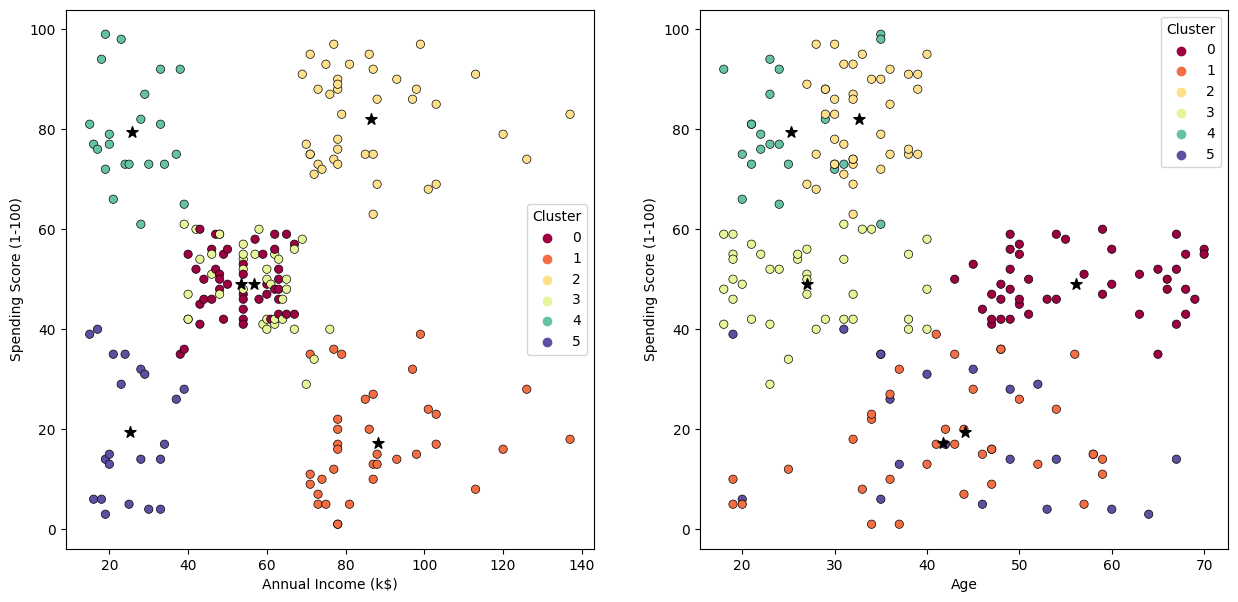

In [59]:
fig2, axes = plt.subplots(1, 2, figsize=(15, 7))

# Scatterplot for Annual Income vs Spending Score
sns.scatterplot(data = KM6_df, x = 'Annual Income (k$)', y= 'Spending Score (1-100)',
                hue='Cluster', ax=axes[0], palette='Spectral', 
                edgecolor = 'black', legend='full')

# Scatterplot for Age vs Spending Score
sns.scatterplot( data=KM6_df, x = 'Age', y= 'Spending Score (1-100)',
                hue='Cluster', palette='Spectral', edgecolor = 'black', 
                ax=axes[1], legend='full')

# Adding centroids for clusters
axes[0].scatter(x = KM6_centers['Annual Income'], y = KM6_centers['Spending Score'], 
                marker='*', color = 'black', s = 70)
axes[1].scatter(x = KM6_centers['Age'], y = KM6_centers['Spending Score'], 
                marker='*', color = 'black', s = 70)

plt.show()

**K-Means algorithm generated the following 6 clusters:**

- low annual income and low spending score
- high annual income and high spending score
- low annual income and high spending score
- medium annual income and medium spending score (2 similar cluster)
- high annual income and low spending score

There are no distinct groups is terms of customers age.

**Remarks:** Based on the results, **5 cluster K-Means** is the optimal cluster to be used since it gives good distinction between the clusters it generates. Based on the results, there is no need to five further into the statistics for 6 clusters.

# Conclusion


Based on the results of this project, it can be summarize the findings as follows:

1. The average age, annual income, and spending score for female customers are as follows: Average Age: 38.10, Average Annual Income: 59.25, Average Spending Score: 51.53.
 For male customers, the average age is 39.81, the average annual income is 62.23, and the average spending score is 48.51.

2. The highest spending score for both genders is observed in the age group of 25-30 years old. It is noteworthy that there is also significant spending power observed in the age group ranging from 20-40 years old.

3. High annual income is observed in the age group of 25-45 years old for both male and female customers.

4. The elbow method and silhouette score method suggest that the optimal number of clusters to be used is either 5 or 6. In this analysis, 5 clusters were chosen as the best option.

5. The clustering algorithm with 5 clusters yielded the following groups:

- Cluster 1: Customers with low annual income and high spending score (Target)
- Cluster 2: Customers with medium annual income and medium spending score
- Cluster 3: Customers with high annual income and low spending score
- Cluster 4: Customers with high annual income and high spending score (Target)
- Cluster 5: Customers with low annual income and low spending score

6. **Target Customers:** The analysis identified two target customer clusters:

- Cluster 1: Customers with low annual income and high spending score (61% Female & 39% Male)
- Cluster 4: Customers with high annual income and high spending score (54% Female & 46% Male)

7. There was no distinct cluster observed in the age vs. spending score analysis, indicating that age alone may not be a strong predictor of spending behavior.

These findings provide valuable insights into the characteristics of customers and their spending patterns, allowing for a better understanding of the target audience and potential marketing strategies.








# Recommendations

1. Marketing efforts should be focused on customers in Cluster 1 and Cluster 4, as they have high spending scores. Developing targeted marketing campaigns and strategies to attract and retain especially female customers.

2. Since the highest spending scores are observed in the age group of 25-30 years old, tailoring promotions and offers should be considered specifically for this age range.

3. Customers in Cluster 3, who have high annual income but low spending scores, could be targeted with personalized offers and incentives to encourage increased spending. Analyzing their preferences and spending patterns can help create compelling offers that align with their needs and desires.

4. Customizing marketing approaches for each cluster based on their unique characteristics, such as income levels and spending behavior can lead to more effective and targeted marketing campaigns.

5. Additionally, to establish stronger correlations and insights between variables, further data collection may be beneficial. By expanding the dataset and including additional relevant information such as customer preferences, shopping habits, and demographic details, the accuracy and depth of your analysis can be still enhanced.